In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

### **Iris Dataset (Sample Dataset)**
Popular classification dataset with 3 classes; setosa, virginica and versicolor.
\
<a href='https://en.wikipedia.org/wiki/Iris_flower_data_set' >https://en.wikipedia.org/wiki/Iris_flower_data_set</a>


In [3]:
iris_data = datasets.load_iris(return_X_y=False)
df_iris = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']], columns= iris_data['feature_names'] + ['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
# choose two of the classes;  'virginica' , 'setosa' ; class 1 and class 2
df_sample = df_iris[df_iris["target"] != 2]

print("Sample for bivariate logstic regression:", df_sample["target"].unique())

Sample for bivariate logstic regression: [0. 1.]


In [5]:
def prepare_dataset(dataset):
    X = dataset[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']].to_numpy()
    y = dataset[['target']].to_numpy().ravel()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    print("Number of train set :" , len(X_train))
    print("Number of test set :", len(X_test))

    return  X_train, X_test, y_train, y_test

In [6]:
def logistic_regression_predict(x , w, b):  
    pred = None
    z = np.dot(x , w) + b 
    prob = sigmoid(z)
    if prob > 0.5: 
        pred = 1
    else :
        pred = 0
    return pred 

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z)) 
    
    
def logistic_discrimination_2D( X , y , max_iter = 1000 , alpha = 0.05 , epsilon=0.0001):
    # number of features + b
    d = X.shape[1] + 1
    
    # number of data points
    m = X.shape[0]
    
    # prepare a array with X and add x0 and equal it to one
    _X = np.c_[np.ones(m), X]
    
    W = np.random.uniform(-0.01,0.01,d)
    
    pre_grad = np.zeros(d)
    costs = []
    for i in range(max_iter):
        
        z = sigmoid(np.dot(_X , W))


        cost = sum( -y * np.log(z)  - (1 - y) * np.log(1-z))
        costs.append(cost)

        #calulate the gradient
        grad = -1 / m  * np.dot((z - y) , _X)

        # Adjust parameters w and b 
        W = W + (alpha * grad)
        
        if(np.amax(abs(pre_grad - grad)) <= epsilon):
            print("Converage in epoch:" , i)
            break;
            
        pre_grad = grad
    
    return W[1:] , W[0], costs
    

Number of train set : 75
Number of test set : 25
Converage in epoch: 348
Number of Iteration:  349


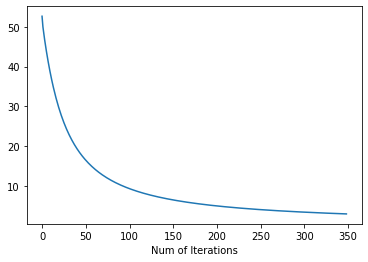

Accuracy on Test set: 100.0
Accuracy of LogisticRegression library:  100.0


In [8]:
X_train, X_test, y_train, y_test = prepare_dataset(df_sample)

K = len(df_sample["target"].unique())
w , b , costs = logistic_discrimination_2D ( X_train, y_train )

iteration_n = len(costs)
print("Number of Iteration: " , iteration_n)
plt.plot(range(iteration_n) , costs)
plt.xlabel("Num of Iterations")
plt.show()

y_pred = [logistic_regression_predict(X_test[i] , w , b) for i in range(len(X_test))]
print("Accuracy on Test set:", accuracy_score(y_test, y_pred) * 100)

clf = LogisticRegression().fit(X_train, y_train)
pridict_lib = clf.predict(X_test)
print("Accuracy of LogisticRegression library: ", accuracy_score(y_test, pridict_lib) * 100)

